<a href="https://colab.research.google.com/github/snehaav1/Salifort-Motors-Project/blob/main/Google_Advanced_Data_Analytics_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
# Load dataset into a dataframe

df0 = pd.read_csv("/content/HR_capstone_dataset.csv")

df = df0.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
df = df.rename(columns={
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'Department': 'department',
    'average_montly_hours': 'average_monthly_hours'
})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [12]:
# Check for missing values
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [14]:

# Check for duplicates
df.duplicated().sum()

np.int64(3008)

In [16]:

# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated()].head(n = 10)
print(duplicates)

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461        

In [17]:
df_clean = df.drop_duplicates()
df_clean.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


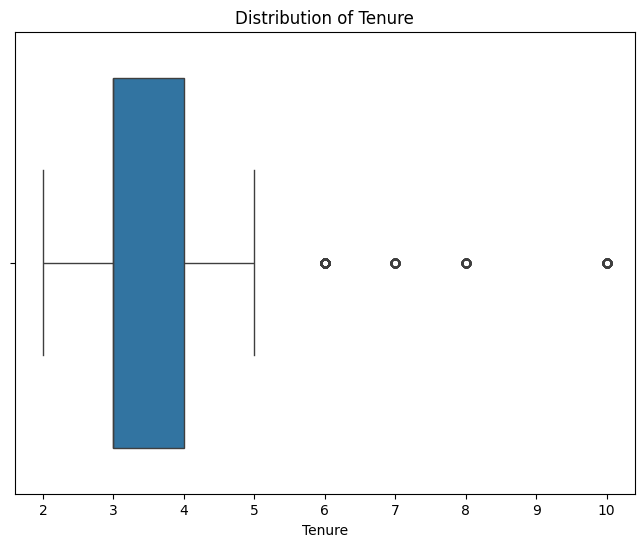

In [18]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['tenure'])
plt.xlabel('Tenure')
plt.title('Distribution of Tenure')
plt.show()

In [20]:

# Determine the number of rows containing outliers
# Define threshold for outliers (e.g., outside 1.5 times the interquartile range)
threshold = 1.5

# Calculate the interquartile range (IQR)
q1 = df_clean['tenure'].quantile(0.25)
q3 = df_clean['tenure'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

# Count the number of rows containing outliers
outliers_count = df_clean[(df_clean['tenure'] < lower_bound) | (df_clean['tenure'] > upper_bound)].shape[0]

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'tenure':", outliers_count)

Number of rows containing outliers in 'tenure': 824


In [22]:
 #Get numbers of people who left vs. stayed
left_counts = df_clean['left'].value_counts()

# Get percentages of people who left vs. stayed
left_percentages = df_clean['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left vs. stayed:")
print(left_counts)
print("\nPercentage of employees who left vs. stayed:")
print(left_percentages)

Number of employees who left vs. stayed:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left vs. stayed:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


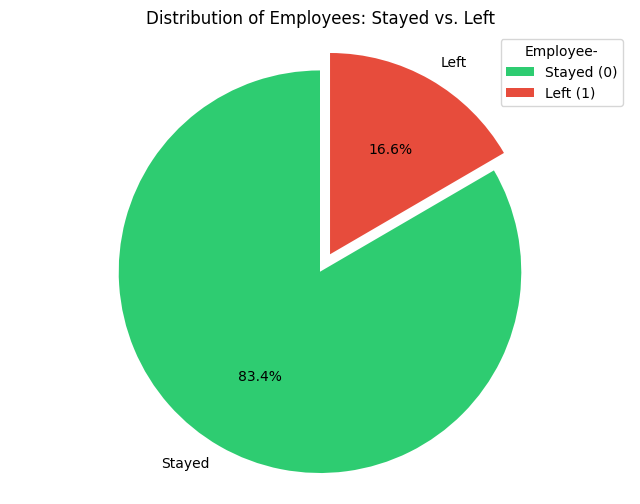

In [23]:
# Calculate the count of employees who left versus stayed
attrition_counts = df_clean['left'].value_counts()

# Define labels and colors for the pie chart
labels = ['Stayed', 'Left']
colors = ['#2ecc71', '#e74c3c']

# Create the advanced pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Employees: Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.axis('equal')
plt.show()

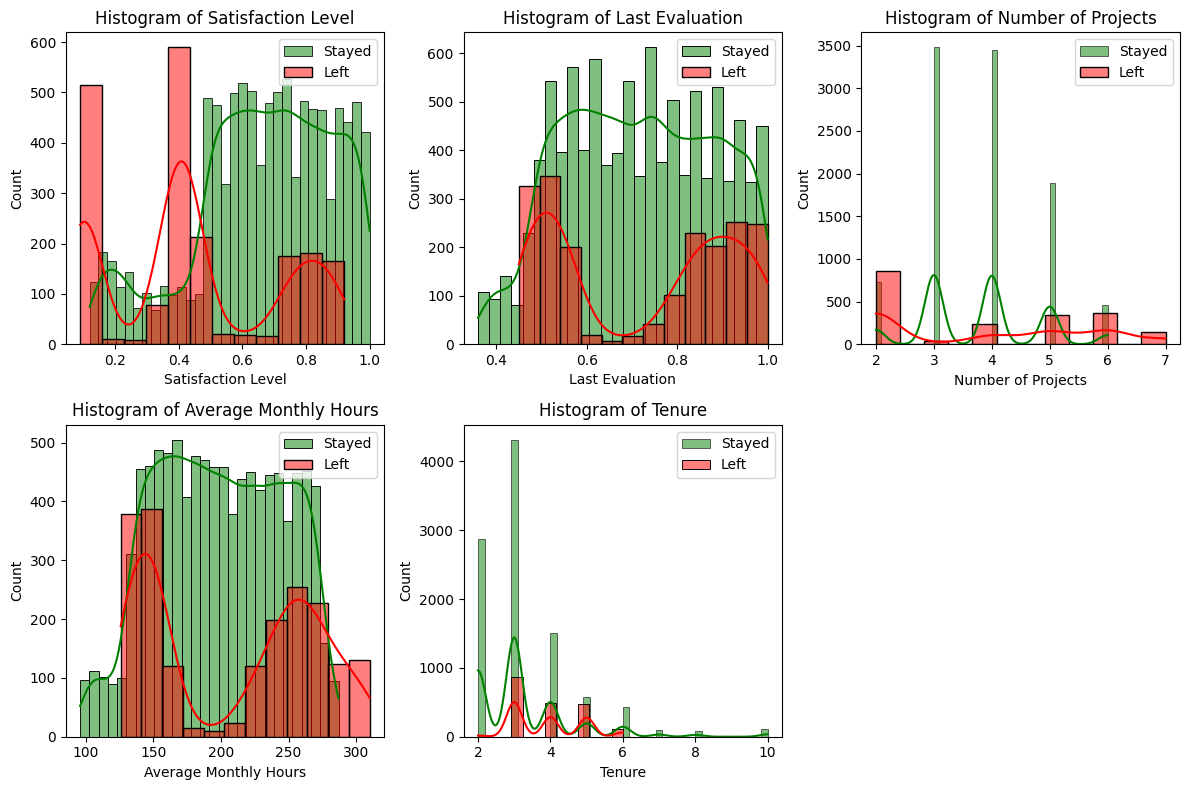

In [24]:
plt.figure(figsize=(12, 8))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(df_clean[df_clean['left'] == 0]['satisfaction_level'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['satisfaction_level'], kde=True, color='red', label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(df_clean[df_clean['left'] == 0]['last_evaluation'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['last_evaluation'], kde=True, color='red', label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

# Plot histogram for number_project
plt.subplot(2, 3, 3)
sns.histplot(df_clean[df_clean['left'] == 0]['number_project'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['number_project'], kde=True, color='red', label='Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Histogram of Number of Projects')
plt.legend()

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(df_clean[df_clean['left'] == 0]['average_monthly_hours'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['average_monthly_hours'], kde=True, color='red', label='Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Histogram of Average Monthly Hours')
plt.legend()

# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(df_clean[df_clean['left'] == 0]['tenure'], kde=True, color='green', label='Stayed')
sns.histplot(df_clean[df_clean['left'] == 1]['tenure'], kde=True, color='red', label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-26-c8f3d524122f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = df_clean.groupby(bins)['left'].mean() * 100
<ipython-input-26-c8f3d524122f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn')


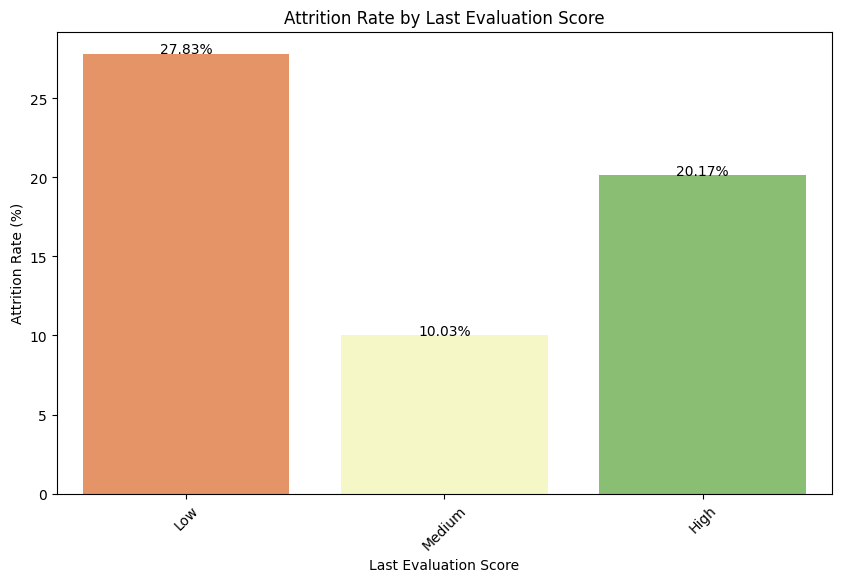

In [26]:
 #Create bins for different ranges of last evaluation scores
bins = pd.cut(df_clean['last_evaluation'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Calculate the attrition rate for each bin
attrition_rate = df_clean.groupby(bins)['left'].mean() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='RdYlGn')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Last Evaluation Score')

# Add count labels to the bars
for i, value in enumerate(attrition_rate.values):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


<ipython-input-28-9ed713247705>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean['left'], y=df_clean['satisfaction_level'], palette={'0': '#2ecc71', '1': '#e74c3c'}, width=0.5)


Text(0.5, 1.0, 'Satisfaction Level of Employees who Left vs. Stayed')

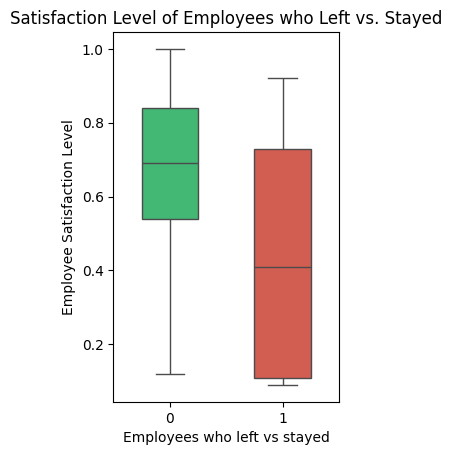

In [28]:
# Box plot
plt.subplot(1, 2, 1)
# Changed palette keys to strings to match the unique values in df_clean['left']
sns.boxplot(x=df_clean['left'], y=df_clean['satisfaction_level'], palette={'0': '#2ecc71', '1': '#e74c3c'}, width=0.5)
plt.xlabel('Employees who left vs stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')

<ipython-input-29-41a3b0b0fcd6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)


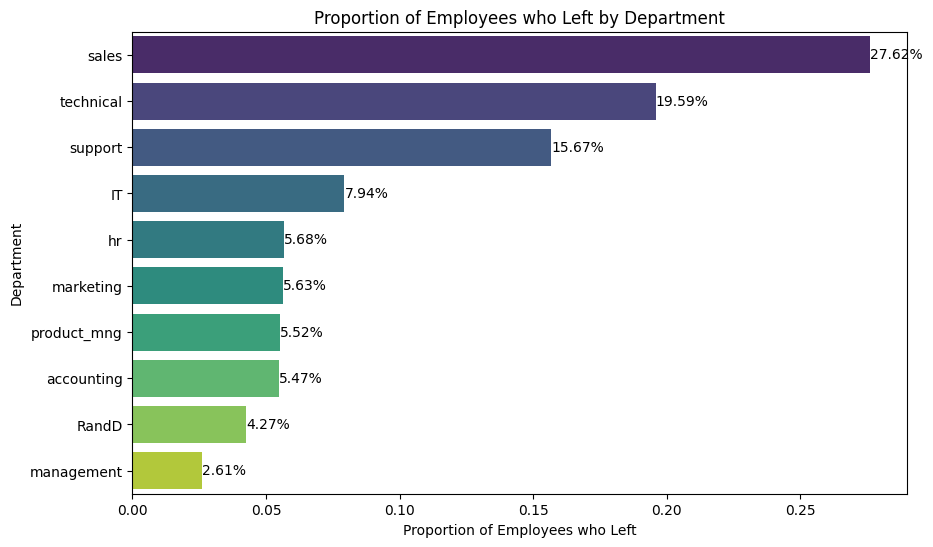

In [29]:
# Calculate the proportion of employees who left in each department
left_by_department = df_clean[df_clean['left'] == 1]['department'].value_counts(normalize=True)

# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

<ipython-input-30-4740e9d5bede>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)


ValueError: The palette dictionary is missing keys: {'1', '0'}

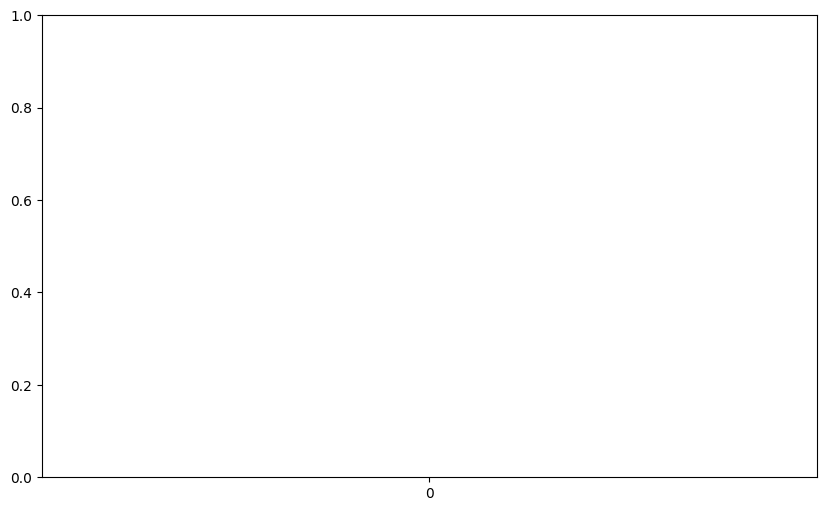

In [30]:
plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes
sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], palette={0: '#2ecc71', 1: '#e74c3c'}, width=0.5)

# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')

# Add statistical annotations
stats = df_clean.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])


plt.show()


<ipython-input-31-9c4c098a2caa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], palette={'0': '#2ecc71', '1': '#e74c3c'}, width=0.5)


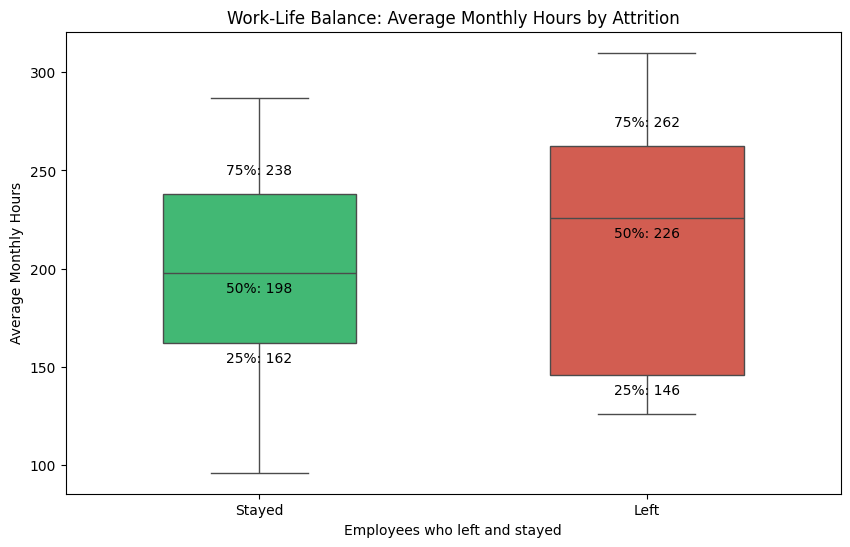

In [31]:
plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes
# Changed palette keys to strings to match the unique values in df_clean['left']
sns.boxplot(x=df_clean['left'], y=df_clean['average_monthly_hours'], palette={'0': '#2ecc71', '1': '#e74c3c'}, width=0.5)

# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')

# Add statistical annotations
stats = df_clean.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])


plt.show()

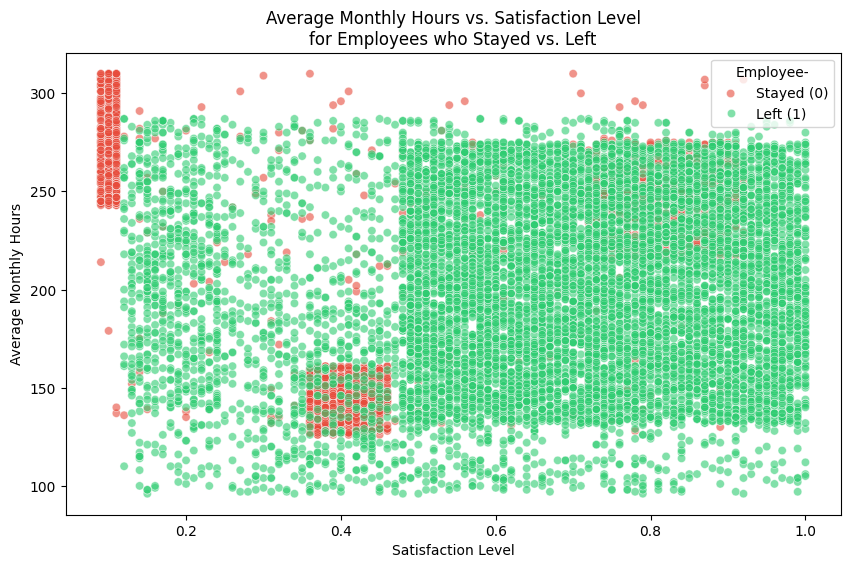

In [32]:
plt.figure(figsize=(10, 6))

# Create scatter plot comparing employees who stayed versus those who left
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left', data=df_clean, palette={0: '#2ecc71', 1: '#e74c3c'}, alpha=0.6)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Satisfaction Level\nfor Employees who Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()

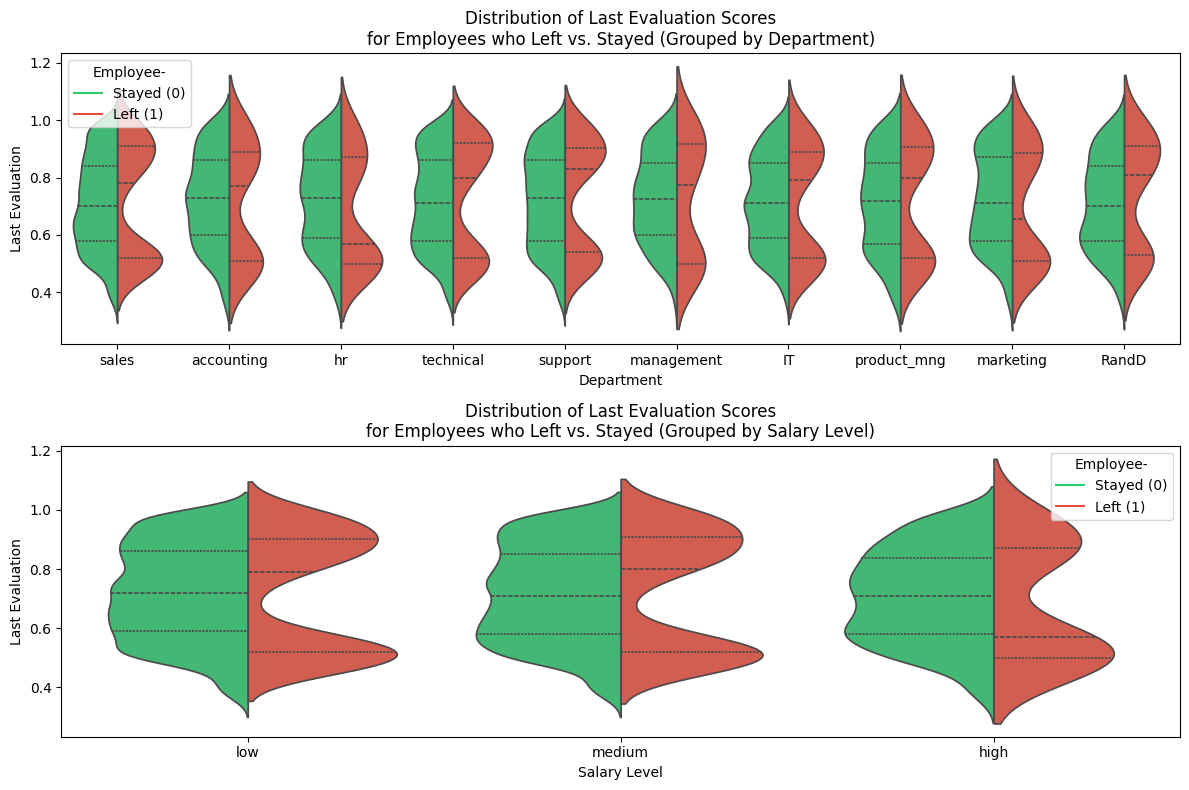

In [33]:
# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by department
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.violinplot(x='department', y='last_evaluation', hue='left', data=df_clean, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Create custom legend elements
legend_elements = [
    plt.Line2D([0], [0], color='#2ecc71', label='Stayed (0)'),
    plt.Line2D([0], [0], color='#e74c3c', label='Left (1)'),
]

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Department')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Department)')

# Create violin plot comparing last evaluation scores for employees who left versus stayed, grouped by salary level
plt.subplot(2, 1, 2)
sns.violinplot(x='salary', y='last_evaluation', hue='left', data=df_clean, split=True, inner='quartile', palette={0: '#2ecc71', 1: '#e74c3c'})

# Add the custom legend elements to the plot
plt.legend(handles=legend_elements, title='Employee-')

plt.xlabel('Salary Level')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Salary Level)')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

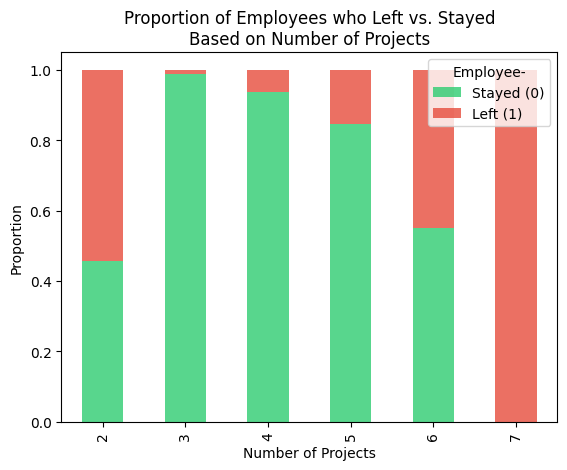

In [34]:
plt.figure(figsize=(10, 6))

# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = df_clean.groupby(['number_project', 'left']).size().unstack()
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)

# Create the stacked bar plot
project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], alpha=0.8)

# Set labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()

<ipython-input-35-e1f0b63b6973>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = count / total_counts[i] * 100


<Figure size 1000x600 with 0 Axes>

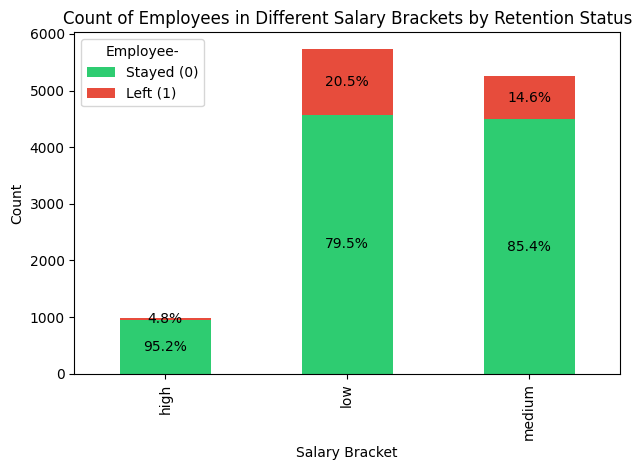

In [35]:
plt.figure(figsize=(10, 6))

# Count the number of employees in each salary bracket
salary_count = df_clean.groupby(['salary', 'left']).size().unstack()

# Set the colors for employees who stayed and left
colors = ['#2ecc71', '#e74c3c']

# Create the grouped bar plot
salary_count.plot(kind='bar', stacked=True, color=colors)

# Add labels, title, and legend
plt.xlabel('Salary Bracket')
plt.ylabel('Count')
plt.title('Count of Employees in Different Salary Brackets by Retention Status')
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

# Add percentage labels on top of each bar
total_counts = salary_count.sum(axis=1)
for i, (index, row) in enumerate(salary_count.iterrows()):
    for j, count in enumerate(row):
        percentage = count / total_counts[i] * 100
        plt.text(i, row[:j].sum() + count / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

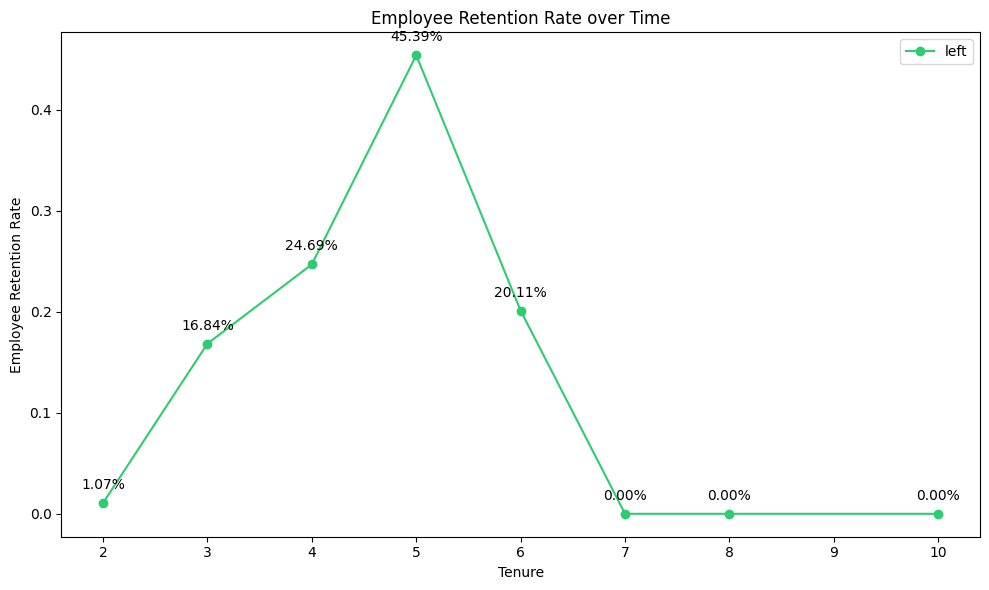

In [36]:
plt.figure(figsize=(10, 6))

# Group the data by tenure and calculate the turnover rate
turnover_rate = df_clean.groupby('tenure')['left'].mean()

# Create the line plot
turnover_rate.plot(marker='o', linestyle='-', color='#2ecc71')
plt.xlabel('Tenure')
plt.ylabel('Employee Retention Rate')
plt.title('Employee Retention Rate over Time')
plt.legend()

# Annotate each data point with its turnover rate
for x, y in zip(turnover_rate.index, turnover_rate.values):
    plt.annotate(f'{y:.2%}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', color='black')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

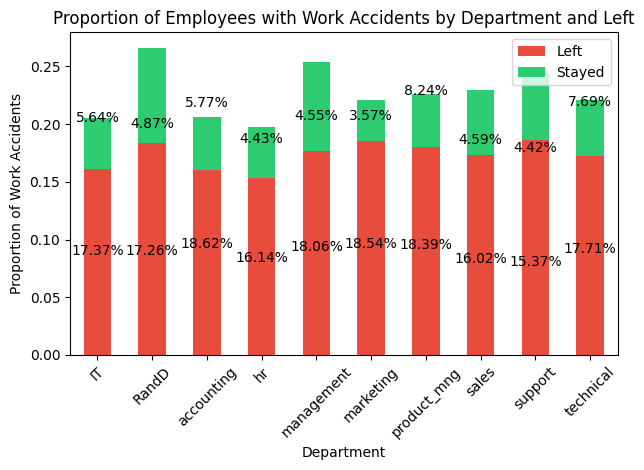

In [37]:
plt.figure(figsize=(10, 6))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = df_clean.groupby(['department', 'left'])['work_accident'].mean().unstack()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']

# Create the grouped bar plot
work_accident_prop.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.xlabel('Department')
plt.ylabel('Proportion of Work Accidents')
plt.title('Proportion of Employees with Work Accidents by Department and Left')
plt.xticks(rotation=45)
plt.legend(['Left', 'Stayed'])

# Add the proportion labels for each bar
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    plt.text(i, stayed_prop / 2, f'{stayed_prop:.2%}', ha='center', color='black')
    plt.text(i, stayed_prop + left_prop / 2, f'{left_prop:.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()